In [2]:
# Authors: Aro2152
# Copyright (C) 2022 Aro2152

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("../docs/data/Sheet 3-Table 1.csv", sep=";", decimal=",")

# Shuffle data
dataset = dataset.sample(frac=1).reset_index(drop=True)

display(dataset.head(10))
print(len(dataset))

,troops_1,troops_2,attack_1,attack_2,defense_1,defense_2,health_1,health_2,troop_loss
0,692,448,63.86,79.05,120.0,147.0,120.0,135.0,17
1,1262,1008,79.05,63.86,147.0,120.0,135.0,120.0,40
2,1282,96,66.96,79.36,120.0,149.4,120.0,137.4,24
3,316,512,79.05,63.86,147.0,120.0,135.0,120.0,20
4,1039,403,79.05,63.86,147.0,120.0,135.0,120.0,36
5,96,1282,79.36,66.96,149.4,120.0,137.4,120.0,11
6,1170,1352,63.86,79.05,120.0,147.0,120.0,135.0,23
7,600,900,79.05,63.86,147.0,120.0,135.0,120.0,27
8,472,286,63.86,79.05,120.0,147.0,120.0,135.0,14
9,414,644,79.05,63.86,147.0,120.0,135.0,120.0,23


76


In [4]:
new_dataset = dataset.copy()
new_dataset["damage_factor_100"] = new_dataset["troops_1"] * new_dataset["attack_1"] / new_dataset["defense_2"]
new_dataset["troop_losses"] = new_dataset["damage_factor_100"] / new_dataset["health_2"]

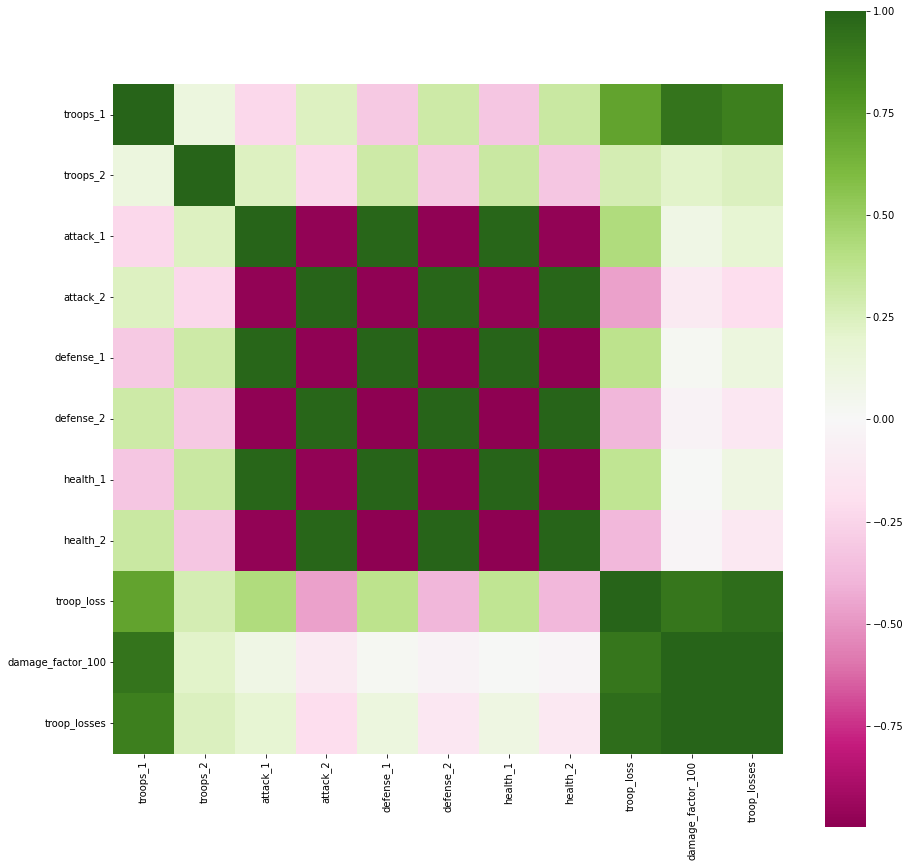

In [5]:
C_mat = new_dataset.corr()
fig = plt.figure(figsize=(15,15))

sb.heatmap(C_mat, vmax=1.0, square=True, cmap="PiYG")
# sb.heatmap(C_mat, vmax=0.8, square=True)

plt.show()

In [6]:
# X_test = dataset[0:10].drop(["troop_loss"], axis=1)
# Y_test = dataset[0:10]["troop_loss"]

# X_train = dataset[10:].drop(["troop_loss"], axis=1)
# Y_train = dataset[10:]["troop_loss"]

X_test = new_dataset[0:10][["troops_1", "troops_2", "damage_factor_100", "troop_losses"]]
Y_test = new_dataset[0:10]["troop_loss"]

X_train = new_dataset[10:][["troops_1", "troops_2", "damage_factor_100", "troop_losses"]]
Y_train = new_dataset[10:]["troop_loss"]

In [57]:
NN_model = Sequential()

act = 'relu'
# act = 'tanh'
# act = 'sigmoid'
# act = 'linear'

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation=act))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation=act))
NN_model.add(Dense(256, kernel_initializer='normal', activation=act))
NN_model.add(Dense(256, kernel_initializer='normal', activation=act))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [58]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

2022-05-03 20:21:32.493535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-03 20:21:32.803300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 26ms/step - loss: 2.1192 - mean_absolute_error: 2.1192 - mean_squared_error: 6.7057


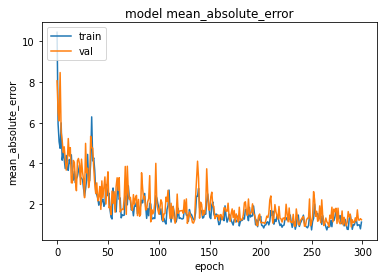

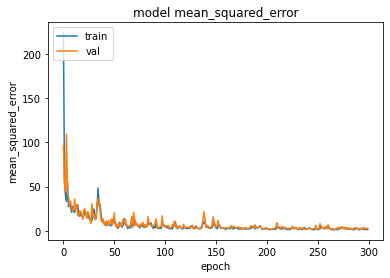



MAE: 2.12


In [59]:
# Fit model using training sets
history = NN_model.fit(X_train, Y_train, epochs=200, batch_size=8, validation_split=0.2, verbose=0)

# Evaluate model with test data set
scores = NN_model.evaluate(X_test, Y_test)

# Plot results
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.show()

# Print evaluation results
print("\n\nMAE: %.2f" % (scores[1]))

In [60]:
scores

[2.1192238330841064, 2.1192238330841064, 6.705726623535156]

In [49]:
# Make a prediction

prediction = NN_model.predict(dataset[0:1].drop(["troop_loss"], axis=1))

print(f"Ground truth : {dataset[0:1]['troop_loss'].values[0]}")
print(f"Prediction : {prediction[0][0]}")

ValueError: in user code:

    /Users/arwan/miniforge3/envs/backup_env/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /Users/arwan/miniforge3/envs/backup_env/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /Users/arwan/miniforge3/envs/backup_env/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /Users/arwan/miniforge3/envs/backup_env/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/arwan/miniforge3/envs/backup_env/lib/python3.9/site-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 8)


In [50]:
prediction = NN_model.predict([[500, 1600, 79.36, 66.96, 149.4, 120, 137.4, 120]])
print(f"Prediction : {prediction[0][0]}")

Prediction : 26.45160675048828


2022-05-03 20:12:36.944492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [51]:
prediction = NN_model.predict([[1600, 500, 66.96, 79.36, 120, 149.4, 120, 137.4]])
print(f"Prediction : {prediction[0][0]}")

Prediction : 31.208271026611328
